**Support Vector Machines in MNIST**

In [1]:
#Download dataset
!wget http://www.innovacademy.com/my_resources/subsample-mnist-hog.npy
!wget http://www.innovacademy.com/my_resources/util_data_load.py

--2022-02-21 22:15:07--  http://www.innovacademy.com/my_resources/subsample-mnist-hog.npy
Resolving www.innovacademy.com (www.innovacademy.com)... 108.167.158.160
Connecting to www.innovacademy.com (www.innovacademy.com)|108.167.158.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47330420 (45M)
Saving to: ‘subsample-mnist-hog.npy’

subsample-mnist-hog 100%[===================>]  45.14M  11.9MB/s    in 4.2s    

2022-02-21 22:15:12 (10.8 MB/s) - ‘subsample-mnist-hog.npy’ saved [47330420/47330420]

--2022-02-21 22:15:12--  http://www.innovacademy.com/my_resources/util_data_load.py
Resolving www.innovacademy.com (www.innovacademy.com)... 108.167.158.160
Connecting to www.innovacademy.com (www.innovacademy.com)|108.167.158.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4439 (4.3K)
Saving to: ‘util_data_load.py’

util_data_load.py   100%[===================>]   4.33K  --.-KB/s    in 0s      

2022-02-21 22:15:13 (452 MB/s) - ‘util_d

In [2]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import util_data_load as util

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [3]:
#load parameters
parameters_file = "subsample-mnist-hog.npy"
parameters = np.load(parameters_file, allow_pickle=True).item()
print(parameters.keys())

dict_keys(['y_train', 'y_test', 'train_data', 'test_data', 'width', 'height', 'X_train', 'X_test'])


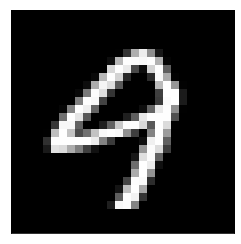

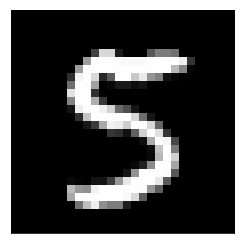

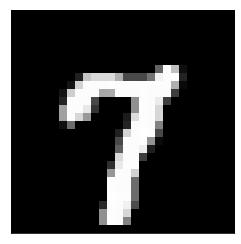

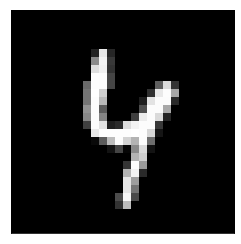

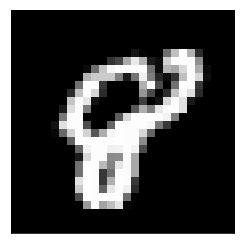

In [5]:
width = parameters["width"]
height = parameters["height"]

for i in range(5):
  plt.matshow(np.reshape(parameters["test_data"][i], newshape = (width, height)), cmap='gray')
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


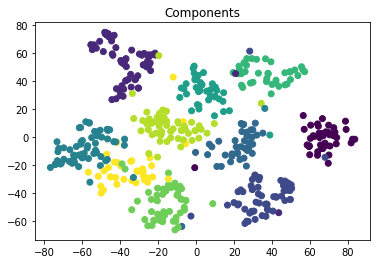

In [6]:
util.prepare_data(parameters, True)
util.plot(parameters, 500)

In [7]:
#Split into train test sets
X_train, X_test, y_train, y_test = parameters['X_train'], parameters['X_test'], parameters['y_train'], parameters['y_test']

In [8]:
#Train the model
svm = SVC(C=10.0, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=10.0)

In [9]:
accuracy_score(y_test, svm.predict(X_test))

0.9851666666666666

In [10]:
svm = SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C':[1, 10]
}

clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [11]:
clf.score(X_test, y_test)

0.9851666666666666